# PDE Steak Cooking Model
**Fatima, Shadi, Stallon**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def solve_steak_heateqn_flip(u0, kappa, thickness, tsave, dz, dt, flip_time):
    """
    Solves the 1D heat equation for a steak being cooked on a grill, accounting for flipping halfway.

    Parameters:
    u0       : function   - Initial temperature distribution function.
    kappa    : float      - Thermal diffusivity of the steak.
    thickness: float      - Thickness of the steak (cm).
    tsave    : array      - Time instances at which temperature profiles are saved.
    dz       : float      - Spatial step size (cm).
    dt       : float      - Time step size (seconds).
    flip_time: float      - Time (in seconds) when the steak is flipped.

    Returns:
    usave    : 2D array   - Saved temperature distributions at different times.
    z        : array      - Spatial positions (depth of the steak).
    """

    # Define spatial grid
    z = np.linspace(0, thickness, int(thickness/dz) + 1)
    Nz = len(z) 

    # Compute stability factor for finite difference method
    mu = kappa * dt / dz**2  

    u = u0(z)  # Set initial temperature distribution
    usave = np.zeros((len(tsave), Nz))  # Array to store temperature profiles at different times

    # Initial boundary condition: Bottom of steak is at 450°F (grill contact), top is insulated
    u[0] = 450  

    t = 0  # Initialize time
    it = 0  # Time step index for saving results
    flipped = False  # Flag to track when the steak is flipped

    # Time-stepping loop to solve heat equation iteratively
    while True:
        # Save the temperature profile at specified time steps
        if t >= tsave[it] - 1e-12:  
            usave[it, :] = u  # Store temperature distribution at this time
            it += 1
            if it >= len(tsave):  # Stop if all required time steps have been recorded
                break
        
        # Copy current temperature values for the next iteration
        u_new = u.copy()

        # Finite difference method
        for i in range(1, Nz - 1):
            u_new[i] = u[i] + mu * (u[i+1] - 2*u[i] + u[i-1])  # Heat diffusion equation

        # Check if it's time to flip the steak
        if not flipped and t >= flip_time:
            flipped = True  # Mark as flipped

        # Apply boundary conditions based on whether the steak has been flipped
        if not flipped:
            # Before flipping: Bottom at 450°F, Top is insulated
            u_new[0] = 450  # Maintain grill temperature at the bottom
            u_new[-1] = u[-1] + mu * (2*u[-2] - 2*u[-1])  # Insulated top boundary
        else:
            # After flipping: Top at 450°F, Bottom is insulated
            u_new[-1] = 450  # Now top is in contact with grill at 450°F
            u_new[0] = u[0] + mu * (2*u[1] - 2*u[0])  # Insulated bottom boundary

        # Update temperature values for the next iteration
        u = u_new
        t += dt  # Increment time step

    return usave, z  


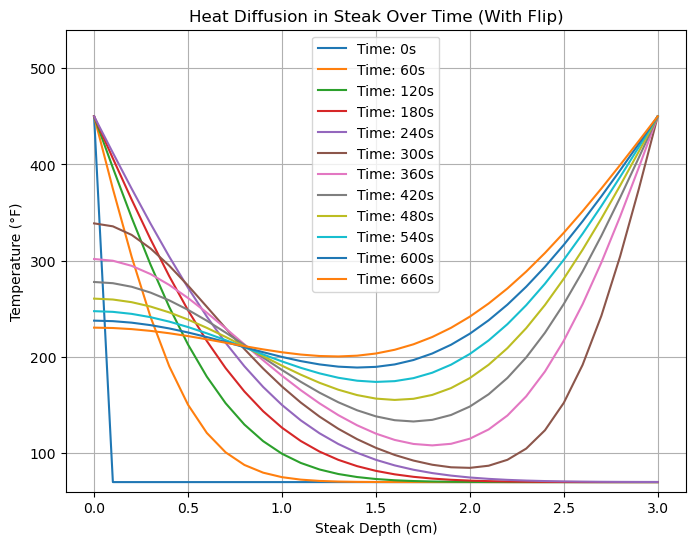

In [3]:
# Define initial steak temperature (room temperature at 70°F)
u0 = lambda z: np.full_like(z, 70)

# Define steak properties
thickness = 3  # Steak thickness in cm
dz = 0.1       # Thickness step 
dt = dz**2 / 4 # Time step
kappa = 1.33 * 10**(-3)  # Thermal diffusivity for meat

# Define time at which the steak is flipped
flip_time = 240  # Flip after 180 seconds

# Times at which to save temperature profiles (seconds)
tsave = np.array([0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660])

# Solve the heat equation with flipping
u, z = solve_steak_heateqn_flip(u0, kappa, thickness, tsave, dz, dt, flip_time)

# Plot results
plt.figure(figsize=(8,6))
for i in range(len(tsave)):
    plt.plot(z, u[i], label=f'Time: {tsave[i]}s')

plt.xlabel('Steak Depth (cm)')
plt.ylabel('Temperature (°F)')
plt.title('Heat Diffusion in Steak Over Time (With Flip)')
plt.legend()
plt.ylim(60, 540)  # Adjusting to realistic steak cooking temperature range
plt.grid()
plt.show()
